<a href="https://colab.research.google.com/github/FinLZ/NEUR265_Zakas/blob/main/02_08_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining cell types by their electrophysiology

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use these features to compare and contrast cell types in the brain.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas.

><b>Task:</b> Go to [The Allen Brain Institute Brain map homepage](http://celltypes.brain-map.org), scroll down to "Download Single Cell Data and Models", scroll to the section "Morphology and Electrophysiology", and click on the <span style = "color:blue"><u>Electrophysiology Page</u></span> link. This page shows you the electrophysiology data from one cell. Look at the "Mouse Line" category in the top left, and note gene name to the left of "-Cre". This is the marker gene for this cell - cells that express this gene also express tdTomato. Go to <span style = "color:blue"><u>https://www.ncbi.nlm.nih.gov/gene/</u></span> and type in the name of this gene. Read about this gene and what it does, and record two pieces of information about this gene in the *Markdown Cell* below

# Htr3a Mus musculus (House Mouse)
- Predicted to be associated with chemical synaptic transmission, positive regulation of ion transmembrane transporter activity, and regulation of membrane potential
- Located in several cell components including the axon and neuronal cell body

## Step 1. Set up our coding environment
Whenever we start an analysis in Python, we need to be sure to import the necessary code packages. If you're running this notebook on Colab or Binder, the cells below will install packages into your coding environment -- we are *not* installing anything on your computer.

### Install the AllenSDK
The Allen Institute has compiled a set of code and tools called a **Software Development Kit** (SDK). These tools will help us import and analyze the cell types data. See [Technical Notes](#technical) at the end of this notebook for more information about working with the AllenSDK.

><b>Task</b>: Run the cell below, which will install the allensdk into your coding environment.

**Technical notes about installing the allensdk**
- If you're running this in Colab, you'll also be prompted to **Restart Runtime** after this is completed. Click the **Restart Runtime** button (nothing will happen), and then you're ready to proceed.
- If you receive an error or are running this notebook on your local computer, there are additional instructions on how to install the SDK locally <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>.

In [1]:
# This will ensure that the AllenSDK is installed.
try:
    import allensdk
    print('allensdk imported')
except ImportError as e:
    !pip install allensdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 KB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 KB 1.4 MB/s eta 0:00:00
     ━

><b>Task</b>: We also need to make sure that our coding environment has [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/) already installed. Run the cell below -- any packages that are missing will be installed for you.

In [2]:
# This will ensure that Numpy, Pandas, and Matplotlib are installed.
try:
    import numpy
    print('numpy already installed')
except ImportError as e:
    !pip install numpy
try:
    import pandas
    print('pandas already installed')
except ImportError as e:
    !pip install pandas  
try:
    import matplotlib
    print('matplotlib already installed')
except ImportError as e:
    !pip install matplotlib

numpy already installed
pandas already installed
matplotlib already installed


### Import common packages
Below, we'll `import` a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

In [3]:
# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

# Import pandas for working with databases
import pandas as pd

# Import numpy below
import numpy as np

# Add your print() statement below
print('Packages imported!')

Packages imported!


### Import the CellTypesModule from the allensdk
With the allensdk installed, we can `import` the **CellTypesCache module**.

The CellTypesCache that we're importing provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look in the cell_types folder in your code directory and take a look at the file.

><b>Task</b>: Run the cell below.

In [4]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('CellTypesCache imported.')

CellTypesCache imported.


## Step 2. Import data for a single cell

Now that we have the module that we need, let's import a raw sweep of the data. The cell below will grab the data for the same experiment you just looked at on the website. This data is in the form of a [**Neuroscience Without Borders** (NWB)](https://www.nwb.org/) file.

><b>Task</b>: Find the cell specimen ID for the first cell you looked at on the Allen Institute website (hint: it's in the URL), and assign this to <code>cell_id</code> below by replacing the <code>...</code>. Run the cell.

This might take a minute or two. You should wait until the circle in the upper right is <i>not</i> filled (Jupyter Notebook) or you have a green checkmark (Colab) to continue.

In [7]:
# Enter your cell_id below
cell_id = 474626527

# Get the electrophysiology (ephys) data for that cell
data = ctc.get_ephys_data(cell_id)
print('Data retrieved')

2023-02-08 16:37:01,978 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491198297


Data retrieved


Thankfully, our NWB file has some built-in **methods** to enable us to pull out a recording sweep. We can access methods of objects like our `data` object by adding a period, and then the method. That's what we're doing below, with `data.get_sweep()`.


><b>Task:</b> Choose your favorite sweep below. (<u>Hint</u>: go back to the website to see what the sweep numbers are.)
    
<i>Note</i>: You may get an `H5pyDeprecationWarning`, but don't worry about it. This is out of our control. :)

In [15]:
# Assign your favorite sweep number to a variable "sweep_number" below.
sweep_number = 29

sweep_data = data.get_sweep(sweep_number) 
print('Sweep obtained')

Sweep obtained


## Step 3. Plot a raw sweep of data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data.

><b>Task:</b> Run the cell below!

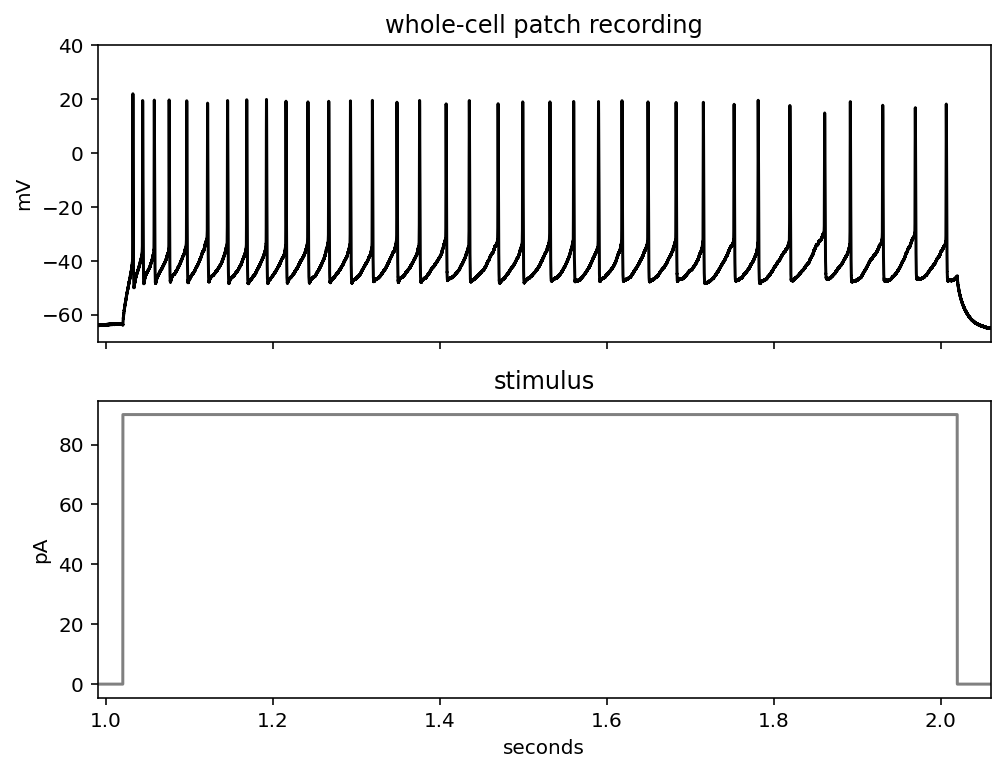

In [23]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

# Set up our plot
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(8,6))

# axes 0 is our first plot, of the recorded voltage data
axes[0].plot(timestamps, response_voltage, color='black')
axes[0].set_ylabel('mV')
axes[0].set_xlim(.99,2.06) # determines the scaling of the x-axis
axes[0].set_ylim(-70,40)
axes[0].set_title('whole-cell patch recording')

# axes 1 is our second plot, of the stimulus trace
axes[1].plot(timestamps, stim_current, color='gray')
axes[1].set_ylabel('pA')
axes[1].set_xlabel('seconds')
axes[1].set_title('stimulus')

plt.show()

This plot probably looks different from the plot on the website, why?

><b>Task:</b> There is a line that has been commented out above.
- Uncomment the line (remove the `#` in front of it) to change the scaling of the x-axis in order to zoom in on the period where the current was applied.
- You can change the values within the parentheses after <code>set_xlim</code> to change the extent of the x axis. There is more documentation about this method <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">here</a>.
- Re-run the cell to re-plot the data.